<a href="https://colab.research.google.com/github/vineet-codes/defi-exploration/blob/main/DeFi_AMMS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports

In [1]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [2]:
import numpy as np

# Notes

## Decentralised Exchanges or DEX's

The core idea behind operating dexes is to let the smart contract be the market maker. The most popular dex's implement some variants of automated market makers. Most popular implementation of AMM's use Const Product (CP) AMM's. CP's use the invariant $x.y=k$, $x$ is the quantity of asset $X$ and $y$ is the quantity of asset $Y$. Core idea is the concept of `liquidity pools`. A pool is a collection of 2(or more) assets.

Two main type of actors in a liquidity pool

- Alice (a.k.a whale): Alice provides her tokens as liquidity to the pool.
- Bob (a.k.a trader): Bob trades between the token and also pays fees to alice for being able to transact in the pool.

## Pricing rules for CP AMM's

> Price is the ratio between assets paid and assets recieved

For a token pair, two types of operations can be performed. We will only discuss **Buying $X$ for $Y$**, for other case Selling **$X$ for $Y$** reader is adviced to derive on their own as an exercise.

1. **Buying $X$ for $Y$**

To derive the prices, we start with invariant rule. We note that, even after the trade, the invariant should hold true. Let $x$ be the initial #$X$ tokens and $y$ be the #$Y$ tokens. Let $\Delta x$ be the $X$ tokens that Bob buys in exchange for $\Delta y$ tokens of asset $Y$. After the trade, the invariant reads as follows,

$$(x-\Delta x).(y + \Phi . \Delta y) = k$$

where $(1 - \Phi)$ is the percentage fees paid to liquidity providers and where $\Delta x > 0$ and $\Delta y > 0$

Solving for $\Delta y$, we get,

$$\Delta y = \dfrac{1}{\Phi} . \dfrac {y.\Delta x}{x - \Delta x}$$

As we can see, in order for Bob to buy $\Delta x$ tokens, he has to provide $\Delta y$ tokens which is equal to $\frac{1}{\Phi} . \frac {y.\Delta x}{x - \Delta x}$ in terms of $\Delta x$.

So, re-ordering previous equation, we get

$$\dfrac{\Delta y}{\Delta x} = \dfrac{1}{\Phi} . \dfrac {y}{x - \Delta x}$$

**Observation 1: Pricing depends on the size of the trade, $\Delta x$,**

in the limit as $\Delta x$ approaches 0:

$$ \lim\_{\Delta x \to 0} \dfrac{\Delta y}{\Delta x}= \frac{1}{\Phi} . \frac{y}{x}$$

This is called the marginal price

$$M_{p} = | \dfrac{y}{x} |$$

**Observation 2: Pricing depends on the size of $x$ and $y$ as $k$**

as $k$ increases, the effective price of the AMM is less sensetive to $\Delta x$

### Slippage in AMM's

Slippage protction

## Incentives for liquidity providers

Lets assume Alice deposits $10ETH$ and $12DAI$ of liquidity, which implies

$$M_p = 1.2$$

where $M_p$ denotes marginal price.

Alice waits for a month, during which traders frive $\$700$ worth of volume through the AMM. At the end of the month, Alice withdraws her $ETH$ and $DAI$. By that time, the marginal price of ETH has gone up by $4x$ [where do we get this number in reality]. the marginal price is now

$$M_p^{'}=4.2$$

**What is Alice's return ?**

We assume: $1-\Phi = 0.003$

- Return from liquidity provider fees (where $V$ is total dollar worth of volume)

$$R_V = V.(1 - \Phi)$$

- Baseline return $R_B$

$$R_B = x^{'}M_p^{'} + y^{'}$$

So total Alice returns is

$$R = R_B + R_V$$

$$R = x^{'}M_p^{'} + y^{'} + V.(1 - \Phi)$$

Her profit, in percentage terms is given by,

$$P_L = \dfrac{R}{R_B} - 1 = \dfrac{x^{'}M_p^{'} + y^{'} + V.(1-\Phi)}{xM_p^{'} + y} - 1$$

Recall:

$$x.y=k$$
and
$$M_p = \frac{y}{x}$$
thus,
$$x = \sqrt{\frac{k}{M_p}}$$
and
$$y = \sqrt{k.M_p}$$
Also,
$$x^{'} = \sqrt{\frac{k}{M_p^{'}}}$$

$$y^{'} = \sqrt{k.M_p^{'}}$$

Finally let,

$$M_p^{'} = r.M_p$$

We can simplify to have

$$P_L = \frac{2*\sqrt{r}}{r + 1} + \dfrac{V*(1 - \Phi)}{r*\sqrt{k*M_p}} - 1$$

How do we plot this ?

P/L vs Price change
P/L vs trading volume

### Impremanent Loss

### AMM liquidity mining

## Pegged / stablecoin swap

## AMM Arbitrage

## DEX Aggregators

## Detecting trading opportunities in DeFi protocols

# References

1. [CS251 | DEXES](./dexes.pdf)
2. [DeFi MOOC | AMMS](./amms.pdf)
3. [SoK: Decentralized Exchanges (DEX) with Automated Market Maker (AMM) protocols](https://berkeley-defi.github.io/assets/material/DEX%20with%20AMM%20Protocols.pdf)
4. [An analysis of Uniswap markets](https://berkeley-defi.github.io/assets/material/Analysis%20of%20Uniswap%20Markets.pdf)
5. [A theory of Automated Market Makers in DeFi](https://berkeley-defi.github.io/assets/material/Theory%20of%20AMM%20in%20DeFi.pdf)
6. Uniswap
   - [Uniswap v2 Core](https://uniswap.org/whitepaper.pdf)
   - [Uniswap v3 Core](https://berkeley-defi.github.io/assets/material/Uniswap%20v3%20Core.pdf)
7. Curve Finance
   - [Automatic market-making with dynamic peg](https://curve.fi/files/crypto-pools-paper.pdf)
   - [StableSwap - efficient mechanism for Stablecoin liquidity](https://berkeley-defi.github.io/assets/material/StableSwap.pdf)


# Decentralized Exchanges and Automated Market Makers

In this notebook we will model decentralised exchanges which implement a constant product automated market maker. Central to the idea of automated market maker is the concept of liquidity pools. It differs from traditional order book implementation of market makers. 

In [3]:
def create_market(x=40, y=30):

  liquidity_pool = {'x': x, 'y': x}
  # market constant k 
  k = liquidity_pool['x'] * liquidity_pool['y']
  return liquidity_pool, k

def generate_market_data(liquidity_pool, step=1):

  xs = np.linspace(1, liquidity_pool['x'], 1000)
  ys = []
  for x in xs:
    y = k / x
    ys.append(y)
  return xs, ys

In [19]:
class CP_AMM():

  def __init__(self, x=10000, y=20000):
    num_tokens_X = x
    num_tokens_Y = y

  def deposit_liquidity(self, amt):
    pass

  def trade_token(self, a, B, amt):
    pass

  def plot_market_curve(self):
    pass

In [20]:
CP_AMM()

Hello World


In [15]:
def plot_market(xs, ys):
  fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(15,5))
  # axes.set(xlim=(0,35), ylim=(0,35))
  x = liquidity_pool['x']
  y= liquidity_pool['y']
  axes.set_title(f'CP AMM | x.y=k | x={x}, y={y},k=x.y={x*y}')
  axes.plot(xs, ys)

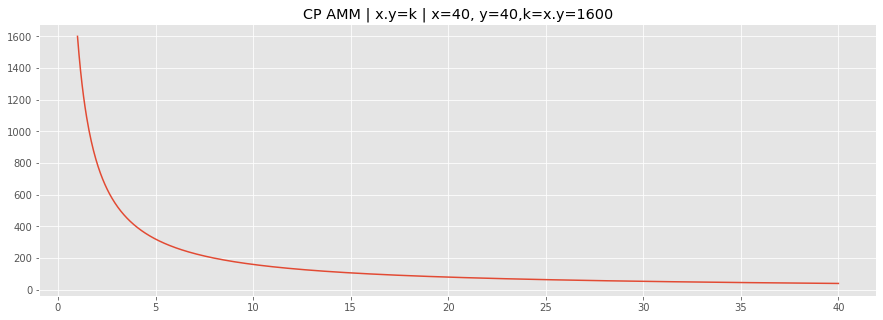

In [16]:
liquidity_pool, k = create_market()
xs, ys = generate_market_data(liquidity_pool)
plot_market(xs, ys)